## Initialize and load the dataset

In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Basic Statistics

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Basic Statistics


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("Baseball.csv")
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


The variables are as follows:

1. Team
2. League
3. Year
4. Runs Scored (RS)
5. Runs Allowed (RA)
6. Wins (W)
7. On-Base Percentage (OBP)
8. Slugging Percentage (SLG)
9. Batting Average (BA)
10. Playoffs (binary)
11. RankSeason
12. RankPlayoffs
13. Games Played (G)
14. Opponent On-Base Percentage (OOBP)
15. Opponent Slugging Percentage (OSLG)


#Statistics in Python (Quick refresher)

## Mean, Median and Mode

The **mean** or average is the sum of elements divided by the number of elements.

The **median** is the central element of an ordered set, or the average of both middle points if the number of elements is even. It is more resistant to extreme values than the mean.

The **mode** is the most frequent number in a set.

In [4]:
#Mean of Runs Scored (RS)
df.RS.mean()

715.0819805194806

In [5]:
#RS Mean for the Arizona Team (ARI) since 2005
df.loc[(df.Team=="ARI") & (df.Year > 2005)].RS.mean()

729.0

In [6]:
# Median vs Mean of Wins (W)
print (df.W.mean())
print (df.W.median()) # very similar, our data is well distributed

80.90422077922078
81.0


In [7]:
# Mode of OBP (On Base Percentage)
print (df.OBP.mode())

0    0.322
Name: OBP, dtype: float64


## Pearson Correlation

Measures the strength of a relationship between two (continuous) variables. Number between -1 and 1. 0 means there is no relationship.

Correlation is not causality!

In [8]:
# Correlation Matrix
df_correlation = df[["RS","RA","W"]]
df_correlation.corr()

,RS,RA,W
RS,1.000000,0.380139,0.511745
RA,0.380139,1.000000,-0.532394
W,0.511745,-0.532394,1.000000


<AxesSubplot:>

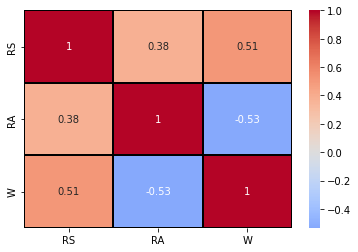

In [9]:
# Correlation Heatmap
sns.heatmap(data = df_correlation.corr(), 
            annot = True,
            fmt = '.2g',
            cmap = 'coolwarm',
            linewidths=2,
            linecolor='black',
            center=0) # center colors around 0

## Standard Deviation

Measures dispersion from the mean.
High values = high variability.

In [10]:
print(df.OOBP.mean())
df.OOBP.std() # not dispersed

0.3322642857142857


0.015295316041389943

## Normal (Gaussian) Distribution

Symetric bell-shaped distribution around the mean.

**68-95-99 rule** : 
- 68% percent of observations are within 1 standard deviation from the mean
- 95% percent of observations are within 2 standard deviations from the mean
- 99.7% percent of observations are within 3 standard deviations from the mean


In [11]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics


In [12]:
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

In [13]:
df = pd.read_csv('Wine-quality-challenge.csv')

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:ylabel='Density'>

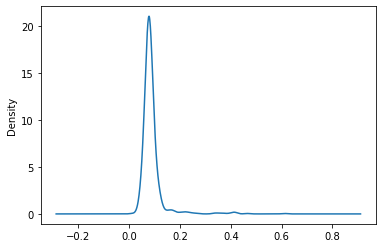

In [15]:
#Density plot for chlorides
df.chlorides.plot.density()

In [16]:
#Check the number of observations within 1 standard deviation
df.loc[(df.chlorides <= df.chlorides.mean() + 1 * df.chlorides.std()) & 
       (df.chlorides >= df.chlorides.mean() - 1 * df.chlorides.std())].chlorides.count()/df.chlorides.count()

0.9480925578486554

In [17]:
# 94% -> probably not a normal distribution!

## P-Value

Tells us if we reject the hypothesis or not. Probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct. 

A small p-value would mean we favor the alternate hypothesis. The usual treshold is 0.05

* H0 (null-hypothesis) : The avg salary of business analysts is 60K euros
* H1 (alternate hypothesis) : it is not

P-Value = 0.2 -> it's greater than 0.05 -> We fail to reject the hypothesis.

**Rejecting doesn't mean the alternate hypothesis is true**. We would have to test it too. Sometimes, the data is not conclusive in any way.

## Shapiro-Wilk test

Checks how likely the data was drawn from a normal distribution.

H0: The distribution is gaussian

In [18]:
stat, p = st.shapiro(df.chlorides)
print(p)

if p > 0.05:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not look Gaussian (reject H0)')

0.0
Sample does not look Gaussian (reject H0)


## Standard Error (of the mean)

Estimates how far the *sample* mean is from the *population* mean. 

In [19]:
st.sem(df.alcohol)

0.026650018979018173

In [20]:
# standard deviation divided by square root of observations
df.alcohol.std() / m.sqrt(df.alcohol.count())

0.026650018979018173

## Z-Score

* Number of standard deviations from the mean. 
* Compares observations to a normal population. 
* Can be used to standardize values

## Confidence interval (z-score when n > 30, otherwise use t distribution)

A range that gives a sense of how precisely a statistic estimates a parameter. 

The confidence level gives the probability that an estimated interval will contain the true value of the parameter. 


In [21]:
# confidence interval of the mean
print(df[['citric acid']].mean())
st.norm.interval(alpha = 0.95,
                 loc = df[['citric acid']].mean(),
                 scale = st.sem(df[['citric acid']]))

citric acid    0.270976
dtype: float64


<ipython-input-21-71e67d24aa60>:3: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.norm.interval(alpha = 0.95,


(array([0.26142755]), array([0.28052367]))

array([[<AxesSubplot:title={'center':'citric acid'}>]], dtype=object)

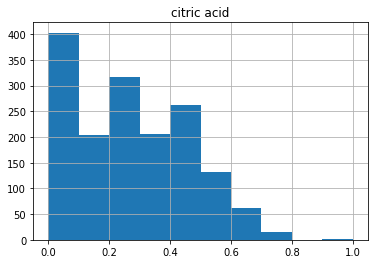

In [22]:
#histogram
df[['citric acid']].hist()

## T-Tests

* Test any statistical hypothesis where the statistics follow a Student's t-distribution.
* Helps understand if a group is different than another. If p-value is less than 0.05, the groups are statistically different.

In [23]:
data = pd.read_csv('stackoverflow.csv')

In [24]:
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
salary_uk = data.loc[data.Country == 'United Kingdom'].Salary
salary_de = data.loc[data.Country == 'Germany'].Salary

stat, p = st.ttest_ind(salary_uk, salary_de)

print(p)

if p > 0.05:
  print('Both countries have similar salaries (fail to reject H0)')
else:
  print('Salaries are different (reject H0)')

0.026389999555203502
Salaries are different (reject H0)


## (Pearson) Chi-square test

Determines whether there is a statistically significant difference between the expected frequencies and the observed frequencies.

Requires categorical variables.

H0 : There is no relationship between variables

In [26]:
#cross tabulation
tab = pd.crosstab(index = data.Country, columns = data.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [27]:
chi2, p, dof, expected = st.chi2_contingency(tab)

print(p)

if p > 0.05:
  print('There is no relationship (fail to reject H0)')
else:
  print('There is a strong relationship (reject H0)')

3.321120877301216e-16
There is a strong relationship (reject H0)


## Linear Regression

Study of the relationship between a dependant variable and at least one independant variable.

* Correlation studies the direction
* Regression studies the impact

In [28]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Linear Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Linear Regression


In [29]:
df = pd.read_csv('diamond.csv')
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [31]:
#isolate X and Y
y = df.price
X = df.carat


In [32]:
#adding a constant column
X = sm.add_constant(X)
X.head(2)

,const,carat
0,1.0,0.3
1,1.0,0.3


In [33]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.04e-150
Time:                        17:34:34   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

In [34]:
#coef carat => One carat increases the price by 11.6k
#R-Squared : we can explain 89.3% of the variance
#Confidence interval : [0.025 .. 0.975] = 11.1k to 12.1k
#Statistical Significance P>|t| -> less than 0.05 so it is statistically significant

Text(0, 0.5, 'Price')

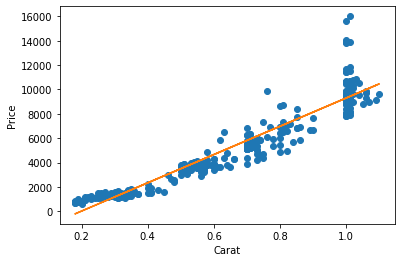

In [35]:
X = df.carat
plt.plot(X, y, 'o') # o means we are opening a plot
b,a = np.polyfit(X, y, 1) 
plt.plot(X, b*X+a) # orange line
plt.xlabel('Carat')
plt.ylabel('Price')

##Linear Regression with dummy variable





In [36]:
df.carat.describe()

count    308.000000
mean       0.630909
std        0.277183
min        0.180000
25%        0.350000
50%        0.620000
75%        0.850000
max        1.100000
Name: carat, dtype: float64

In [37]:
df["carat_binary"] = np.where(df.carat > 0.6, 1, 0)
df.head(3)

,Unnamed: 0,carat,colour,clarity,certification,price,carat_binary
0,1,0.3,D,VS2,GIA,1302,0
1,2,0.3,E,VS1,GIA,1510,0
2,3,0.3,G,VVS1,GIA,1510,0


In [38]:
# isolate X & y
X = df.carat_binary
y = df.price

# add constant
X = sm.add_constant(X)
print(X.head(2))

   const  carat_binary
0    1.0             0
1    1.0             0


In [39]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.79e-73
Time:                        17:34:35   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2225.2303    161.442     13.783   

Text(0, 0.5, 'Price')

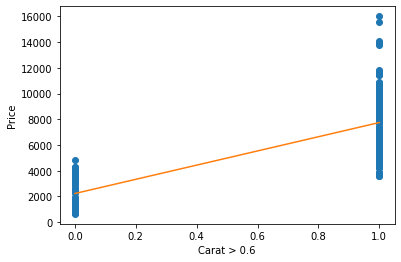

In [40]:
X = df.carat_binary
plt.plot(X, y, 'o') # o means we are opening a plot
b,a = np.polyfit(X, y, 1) 
plt.plot(X, b*X+a) # orange line
plt.xlabel('Carat > 0.6')
plt.ylabel('Price')

## Multilinear Regression

In [41]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression


In [42]:
df = pd.read_csv('salaries.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


###Analysing the data

In [43]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


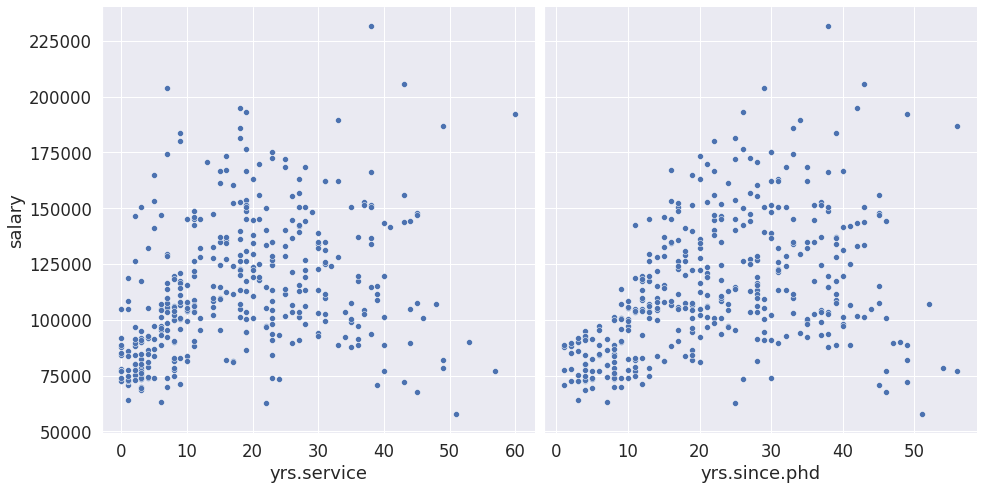

In [44]:
# plotting continuous independant variable against dependant variable
sns.set(font_scale = 1.5)
sns.pairplot(data = df, 
             y_vars = ['salary'],
             x_vars = ['yrs.service', 'yrs.since.phd'],
             height = 7)

<AxesSubplot:>

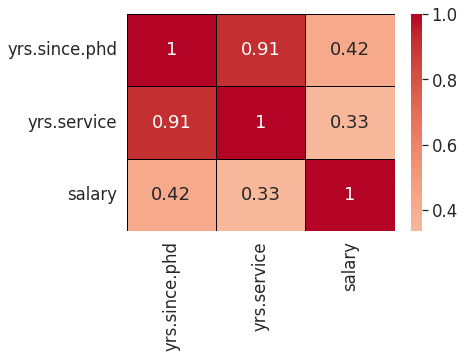

In [45]:
# correlation matrix

sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2g',
            center = 0,
            cmap = 'coolwarm',
            linewidth = 1,
            linecolor='black')

In [46]:
# years since phd is better correlated with the salary

In [47]:
#Categorical Variables

df['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [48]:
df.select_dtypes(include = 'object').value_counts()

rank       discipline  sex   
Prof       B           Male      125
           A           Male      123
AsstProf   B           Male       38
AssocProf  B           Male       32
           A           Male       22
AsstProf   A           Male       18
Prof       B           Female     10
           A           Female      8
AssocProf  B           Female      6
AsstProf   A           Female      6
           B           Female      5
AssocProf  A           Female      4
dtype: int64

In [49]:
categorical = list(df.select_dtypes(include = 'object'))
categorical

['rank', 'discipline', 'sex']

In [50]:
for cat in categorical:
  print(df[cat].value_counts())
  print()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

B    216
A    181
Name: discipline, dtype: int64

Male      358
Female     39
Name: sex, dtype: int64



In [51]:
df.head(1)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750


In [52]:
#transform object into dummies
df = pd.get_dummies(data = df, drop_first = True)
df.head(2)

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1


###Multilinear regression preparation

In [53]:
#isolate X and y
y = df.salary / 1000
X = df.drop(columns = ["salary","yrs.service"])
X.head(1)

,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,0,1,1,1


In [54]:
# adding constant
X = sm.add_constant(X)
X.head(1)

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,1.0,19,0,1,1,1


In [55]:
# Train and Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, 
                                                    random_state = 1502) # to get same results than with the course
X_train.head()

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
105,1.0,31,0,1,0,1
287,1.0,2,1,0,0,1
326,1.0,23,0,1,1,1
15,1.0,12,0,1,1,1
354,1.0,8,1,0,1,1


### Multilinear regression

In [56]:
model = sm.OLS(y_train, X_train).fit()

In [57]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     56.20
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.65e-41
Time:                        17:34:40   Log-Likelihood:                -1424.2
No. Observations:                 317   AIC:                             2860.
Df Residuals:                     311   BIC:                             2883.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            79.6855      5.408     14.735

In [58]:
# Adjusted R-Squared : we can explain 46% of variance
# P>|t| yrs.since.phd is very significant
# coef sex_Male earn on average 5 356$ more but this is not very statistically significant (0.21) 


### Accuracy assessment

In [59]:
predictions = model.predict(X_test)
predictions[:4]

364    118.590061
30     134.868270
378    118.731635
188     99.876615
dtype: float64

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE: ", round(mean_absolute_error(y_test, predictions),1)) 
print("RMSE: ", round(np.sqrt(mean_squared_error(y_test, predictions)),1))
# values in thousands of $

MAE:  18.2
RMSE:  25.8


## Logistic Regression (classification problem)

* Linear is for continuous, logistic is discrete
* Linear = straight, logistic = curve

In [61]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [62]:
df = pd.read_csv('spam.csv')
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


### Data Analysis, removing outliers

In [63]:
df.describe() # many outliers!

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


array([[<AxesSubplot:title={'center':'crl.tot'}>,
        <AxesSubplot:title={'center':'dollar'}>],
       [<AxesSubplot:title={'center':'bang'}>,
        <AxesSubplot:title={'center':'money'}>],
       [<AxesSubplot:title={'center':'n000'}>,
        <AxesSubplot:title={'center':'make'}>]], dtype=object)

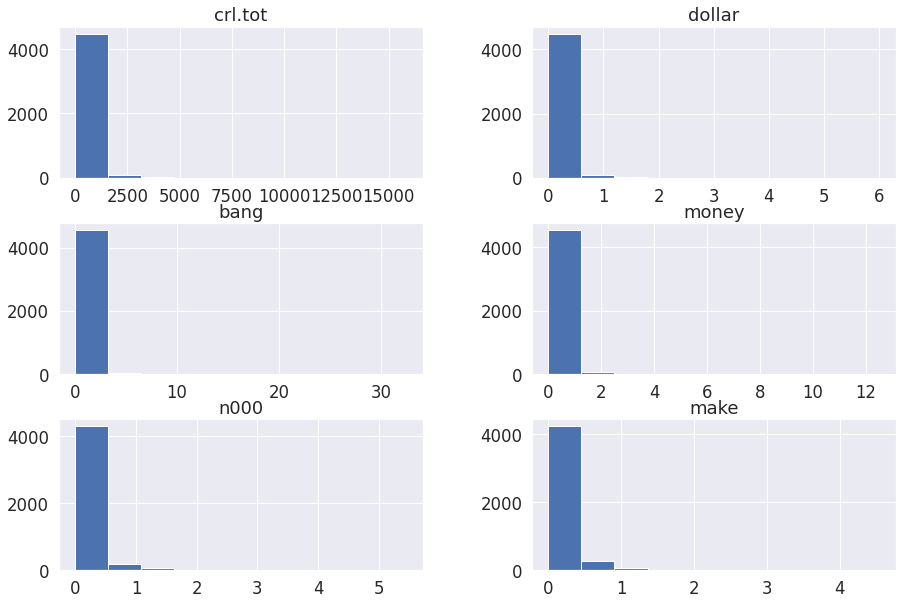

In [64]:
#histograms
df.hist(figsize=(15,10))

array([[<AxesSubplot:title={'center':'crl.tot'}>,
        <AxesSubplot:title={'center':'dollar'}>],
       [<AxesSubplot:title={'center':'bang'}>,
        <AxesSubplot:title={'center':'money'}>],
       [<AxesSubplot:title={'center':'n000'}>,
        <AxesSubplot:title={'center':'make'}>]], dtype=object)

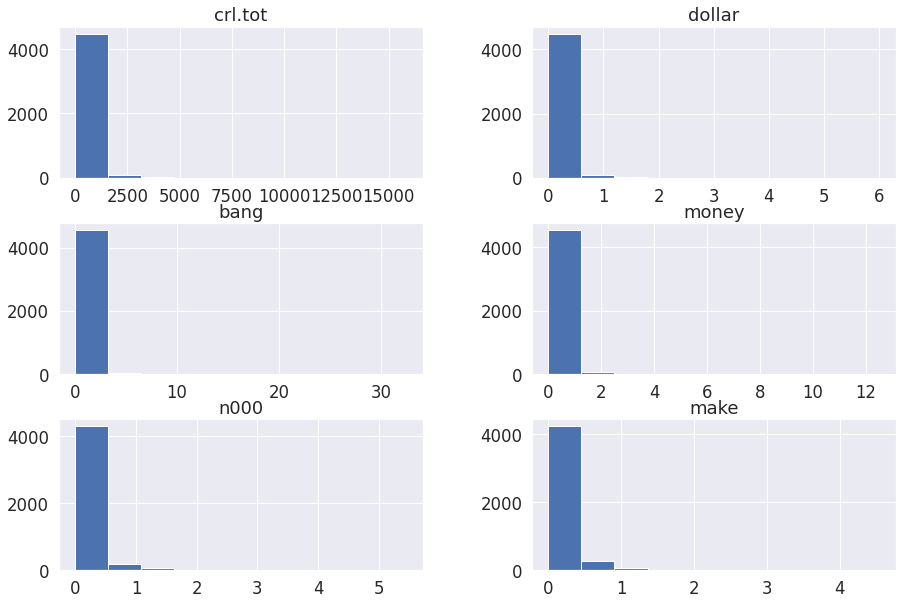

In [65]:
# removing outliers : not a science, it depends on the problem
df.hist(figsize=(15,10))

In [66]:
df = pd.read_csv('spam.csv')
print(len(df))
df = df[df["crl.tot"] < 1500] # removing emails with more than 1500 words
df = df[df["bang"] < 5] # less than 5 exclamation points
df = df[df["money"] < 6]
print(len(df))

4601
4432


array([[<AxesSubplot:title={'center':'crl.tot'}>,
        <AxesSubplot:title={'center':'dollar'}>],
       [<AxesSubplot:title={'center':'bang'}>,
        <AxesSubplot:title={'center':'money'}>],
       [<AxesSubplot:title={'center':'n000'}>,
        <AxesSubplot:title={'center':'make'}>]], dtype=object)

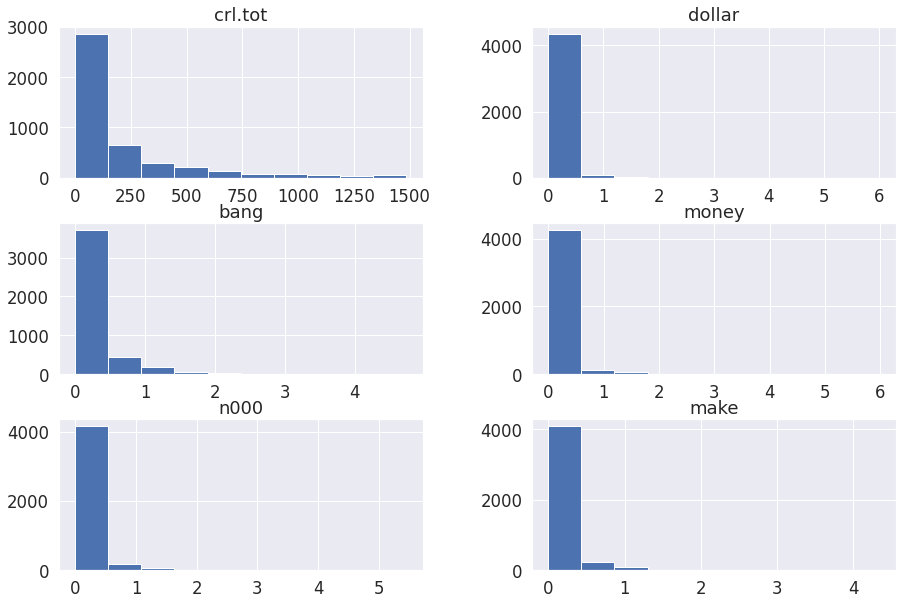

In [67]:
df.hist(figsize=(15,10))

<AxesSubplot:>

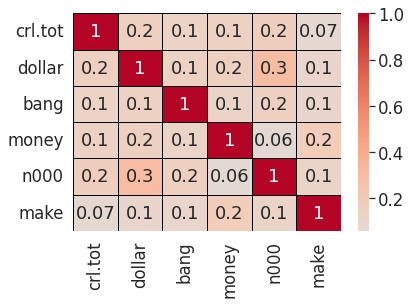

In [68]:
#correlation matrix
sns.heatmap(df.corr(), annot=True, fmt='.1g',center=0, cmap='coolwarm', linewidth=1, linecolor='black')

In [69]:
# no extreme correlation anywhere

### Logistic Regression Preparation

In [70]:
#prepare dependant variable
df["yesno"] = np.where(df['yesno'] == 'y', 1,0)
df.head(1)

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.0,0.778,0.0,0.0,0.0,1


In [71]:
# X & y
y = df.yesno
X = df.iloc[:,:-1] # all except the last column
X = sm.add_constant(X)

In [72]:
#Training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1502)

### Logistic Regression

In [73]:
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.386779
         Iterations 8


In [74]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3545
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            6
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.4210
Time:                        17:34:52   Log-Likelihood:                -1371.1
converged:                       True   LL-Null:                       -2368.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1801      0.074    -29.532      0.000      -2.325      -2.035
crl.tot        0.0017      0.000      8.985      0.000       0.001       0.002
dollar         6.5798      0.682      9.652      0.0

In [75]:
def logistic_reader(coeficient):
  probability = round((np.exp(coeficient)-1)*100,2)
  if probability > 0:
    print("The likelihood increases by ", probability, "%")
  elif probability == 0:
    print("No impact")
  else:
    print("The likelihood decreases by ", probability, "%")


In [76]:
logistic_reader(6.58) # dollar

The likelihood increases by  71953.93 %


In [77]:
logistic_reader(0.00000001) # rounded to 0

No impact


In [78]:
logistic_reader(-0.5)

The likelihood decreases by  -39.35 %


### Assess the model

In [79]:
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0) # replace probabilities with 0/1


In [88]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
# true negatives, false positives, false negatives, true positives

accuracy = (tp + tn) / (tp + tn + fp + fn)
print ("Accuracy: ", round(accuracy * 100, 1), "%")
F1_Score = 2 * tp / (2 * tp + fn + fp)
print ("F1 Score: ", round(F1_Score * 100, 1), "%")
specificity = tn / (tn + fp)
print ("Specificity: ", round(specificity * 100, 1), "%")
sensivisity = tp / (tp + fn)
print ("Sensitivity: ", round(sensivisity * 100, 1), "%")

Accuracy:  83.0 %
F1 Score:  73.7 %
Specificity:  91.4 %
Sensitivity:  67.5 %


In [87]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       573
           1       0.81      0.68      0.74       314

    accuracy                           0.83       887
   macro avg       0.82      0.79      0.81       887
weighted avg       0.83      0.83      0.83       887

